# ROSTAGNO Leonardo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Verifica su pandas e matplolib.pyplot

## Esercizio 1: espressioni facciali
Il file `faces.cs` contiene i dati di 2000 facce di diverse persone. Per ciascun faccia nel dataset è presente il tipo di espressione facciale e un'immagine dell'intero viso.
- la colonna *emotions* descrive il tipo di espressione facciale (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), 
- la colonna *pixels* contiene una immagine di 48x48pixel della espressione facciale. La colonna contiene i 2304=48x48 valori interi che rappresentano le intensità di grigio dei pixel dell'immagine.


1) Realizzare una sola figura nella quale per ogni tipo di espressione facciale siano visualizzate 5 facce scelte a caso tra quelle aventi quel tipo di espressione. Utilizzare la colormap più idonea.



In [81]:
face = pd.read_csv("./faces.csv")
face

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
1995,0,91 115 65 53 99 78 68 90 41 31 70 97 116 129 1...
1996,2,68 48 60 66 53 47 63 77 107 117 95 95 153 201 ...
1997,5,253 253 254 247 171 144 133 145 114 74 90 111 ...
1998,0,26 26 25 25 26 26 26 28 26 27 36 61 77 72 79 7...


In [82]:
face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  2000 non-null   int64 
 1   pixels   2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [83]:
lista_facce = []
emotions = face["emotion"].unique()
emotions

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [87]:
for emozione in emotions:
    rnd = np.random.choice(face["pixels"][face["emotion"] == emozione], size = 1)
    lista_facce.append(rnd[0])
    
for a in range(0, len(lista_facce)):
    lista_facce[a] = lista_facce[a].replace(" ", ",")

arr_face = np.array(lista_facce, dtype = int)
arr_face

array(['42,68,58,71,61,22,26,34,45,76,110,138,136,130,128,140,141,143,141,143,144,141,140,138,140,135,131,97,58,57,45,76,112,110,127,125,109,109,115,131,103,66,63,62,60,56,66,68,42,77,55,80,47,23,30,40,80,109,118,154,159,156,154,158,156,157,151,152,151,146,147,145,144,140,140,127,94,62,64,100,71,100,120,124,104,113,101,105,118,104,67,64,64,62,64,68,67,84,64,93,38,28,41,79,111,131,139,163,173,168,165,164,158,158,158,157,158,153,153,151,154,149,148,135,126,106,112,69,49,81,107,109,108,115,109,104,99,107,102,68,67,67,60,65,91,93,63,88,23,32,50,95,120,143,155,168,181,183,175,175,163,162,165,163,162,160,157,156,149,148,147,141,128,134,115,64,61,53,90,105,102,116,102,102,106,94,97,93,60,70,67,67,95,100,67,86,18,31,64,98,134,162,174,186,186,184,184,186,172,163,166,172,162,159,159,157,157,151,147,147,139,134,139,121,77,46,67,95,100,103,109,92,99,96,94,95,71,69,65,66,102,102,98,92,20,40,72,124,163,174,188,197,206,191,183,185,177,175,175,172,166,164,164,165,164,159,159,159,157,143,110,94,92,56,5

TypeError: cannot unpack non-iterable int object

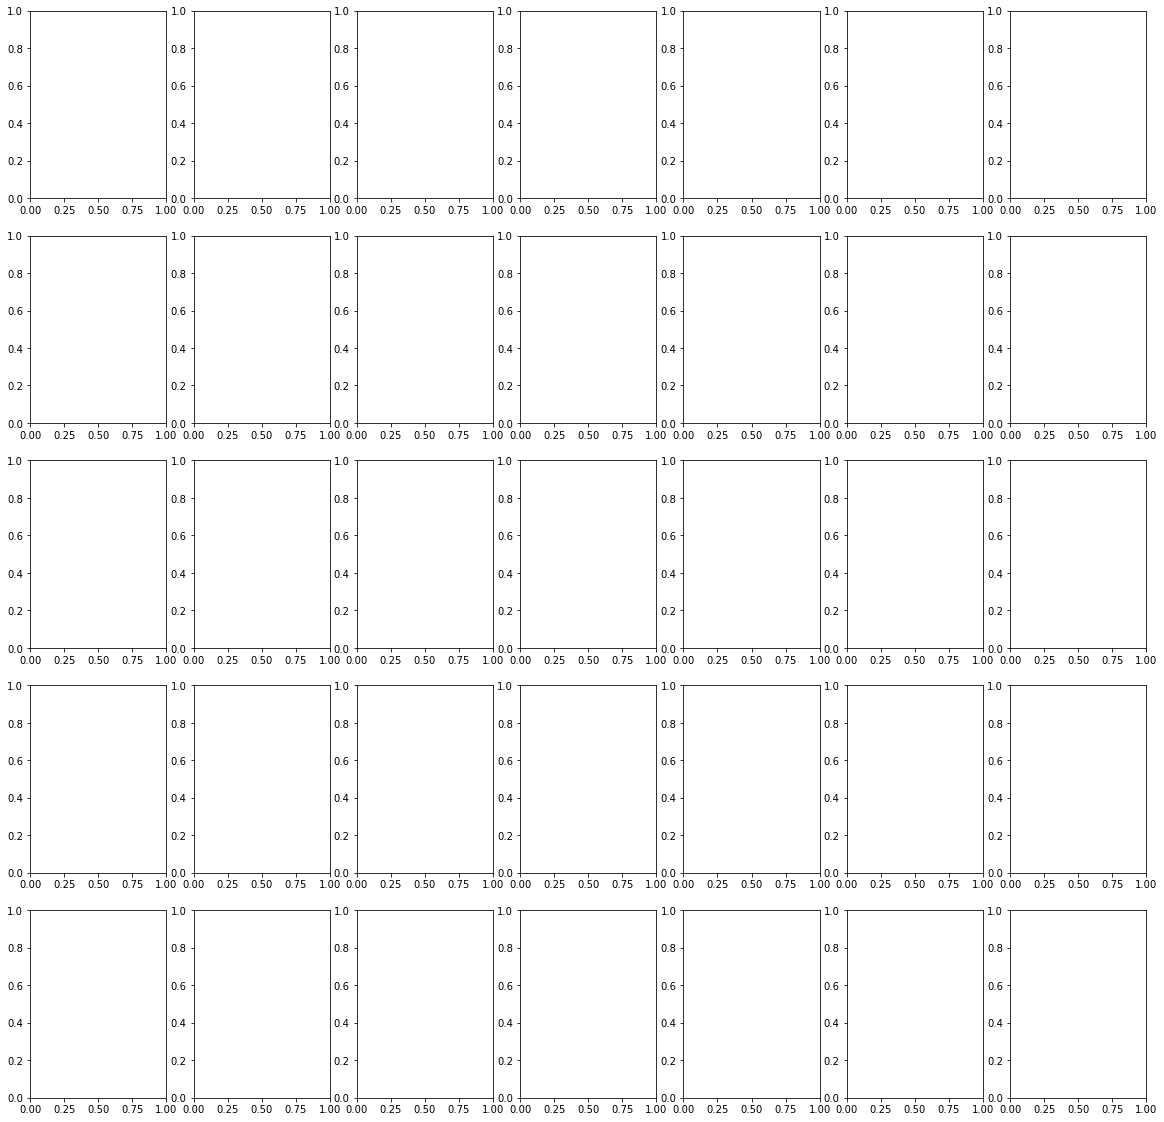

In [90]:
fig, axs = plt.subplots(nrows = 5, ncols = emotions.size, figsize = (20, 20))

for a in range(0, 5):
    for n, b in range(0, len(arr_face)):
        axs[a, b].imshow(face[arr_face[n]].reshape((48, 48)), cmap = "Greys")
    
plt.show()

# Esercizio 2: Olimpiadi Invernali 2022
Il file `medals.csv` contiene tutte le medaglie assegnate sinora alle Olimpiadi Invernali 2022, mentre il file `athletes.csv` contiene tutti gli atleti iscritti alle Olimpiadi con alcune loro informazioni anagrafiche. Rispondi alle seguenti domande utilizzando pandas e matplotlip.

1) Nei due file sono presenti valori mancanti?

2) Quali sono i 5 paesi che hanno vinto più medaglie?

3) Rappresenta la distribuzione delle medaglie rispetto al loro tipo, per i 5 paesi del punto 1, mediante un grafico a barre.

4) Utilizza un histogramma o un diagramma a barre per rappresentare come gli atleti italiani sono suddivisi tra le diverse discipline a cui partecipano.

5) Aggrega i dati degli atleti per `country_code` e `discipline_code` in modo da visualizzare quanti atleti di ogni nazione partecipano in ogni disciplina: salva i dati su un file .csv.

6) **BONUS** C'è qualche atleta italiano nato a Milano che ha vinto una medaglia? In caso affermativo chi?



In [15]:
def NaN_control(dataframe) :
    df_not_NaN = dataframe.dropna()
    diff = 0

    if dataframe.size != df_not_NaN.size :
        diff = dataframe.size - df_not_NaN.size
    
    return diff

In [11]:
medaglie = pd.read_csv("./medals.csv")
atleti = pd.read_csv("./athletes.csv")

In [12]:
medaglie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   medal_type          448 non-null    object
 1   medal_code          448 non-null    int64 
 2   medal_date          448 non-null    object
 3   athlete_short_name  448 non-null    object
 4   athlete_name        448 non-null    object
 5   athlete_sex         448 non-null    object
 6   athlete_link        448 non-null    object
 7   event               448 non-null    object
 8   country             448 non-null    object
 9   country_code        448 non-null    object
 10  discipline          448 non-null    object
 11  discipline_code     448 non-null    object
dtypes: int64(1), object(11)
memory usage: 42.1+ KB


In [13]:
atleti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               2892 non-null   object
 1   short_name         2892 non-null   object
 2   gender             2892 non-null   object
 3   birth_date         2889 non-null   object
 4   birth_place        2621 non-null   object
 5   birth_country      2740 non-null   object
 6   country            2892 non-null   object
 7   country_code       2892 non-null   object
 8   discipline         2889 non-null   object
 9   discipline_code    2892 non-null   object
 10  residence_place    2445 non-null   object
 11  residence_country  2599 non-null   object
 12  height_m/ft        727 non-null    object
 13  url                2892 non-null   object
dtypes: object(14)
memory usage: 316.4+ KB


In [16]:
# punto 1
print(f"Valori mancanti al file Medaglie: {NaN_control(medaglie)}")
print(f"Valori mancanti al file Atleti: {NaN_control(atleti)}")

Valori mancanti al file Medaglie: 0
Valori mancanti al file Atleti: 33418


In [66]:
# punto 4
ita_atl = atleti[(atleti["country_code"] == "ITA")]["discipline"]

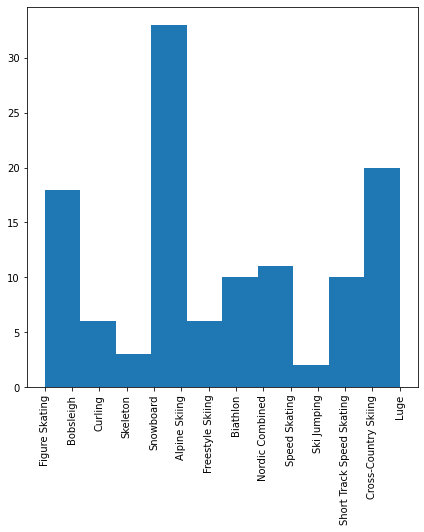

In [74]:
fig, ax = plt.subplots(figsize = (7, 7))

ax.hist(ita_atl)
plt.xticks(rotation=90)

plt.show()

In [94]:
# punto 5
atleti[["country_code", "discipline_code"]].groupby("country_code").count()

,discipline_code
country_code,
ALB,1
AND,5
ARG,6
ARM,6
ASA,1
...,...
TTO,2
TUR,7
UKR,45


# Esercizio 3: i dati di Netflix - completato
Il file `Netflix-Dataset-Latest-2021.xlsx` contiene svariati dati di film e serie Netflix.

1) In media hanno uno score maggiore (`IMDb Score`) i film/serie che durano meno di 30 minuti oppure quelli che durano più di 2h?

2) Utilizza matplotlib creare un grafico a dispersione che mostri la correlazione tra `IMDb Score` e `Awards Received`. I punti del grafico devono avere un colore che dipenda dal numero di voti ricevuti `IMDb Votes`. I grafici devono avere titolo, griglia ed etichette sugli assi.

3) **BONUS**: traccia lo stesso grafico facendo in modo che la dimensione dei punti sia proporzionale al numero di voti `IMDb Votes`.

In [37]:
netflix = pd.read_excel("./Netflix-Dataset-Latest-2021.xlsx")
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  9425 non-null   object        
 1   Genre                  9400 non-null   object        
 2   Tags                   9389 non-null   object        
 3   Languages              9266 non-null   object        
 4   Series or Movie        9425 non-null   object        
 5   Hidden Gem Score       9415 non-null   float64       
 6   Country Availability   9414 non-null   object        
 7   Runtime                9424 non-null   object        
 8   Director               7120 non-null   object        
 9   Writer                 7615 non-null   object        
 10  Actors                 9314 non-null   object        
 11  View Rating            6827 non-null   object        
 12  IMDb Score             9417 non-null   float64       
 13  Rot

In [39]:
# punto 1
dur_min30 = netflix[(netflix["Runtime"] == "< 30 minutes")]["IMDb Score"].mean()
dur_h2 = netflix[(netflix["Runtime"] == "> 2 hrs")]["IMDb Score"].mean()

if dur_min30 > dur_h2:
    print("I film/serie di < 30 minutes hanno una media + alta")
else :
    print("I film/serie di > 2 hrs hanno una media + alta")

I film/serie di < 30 minutes hanno una media + alta


In [48]:
x = netflix["IMDb Score"].values
y = netflix["Awards Received"].values
votes = netflix["IMDb Votes"].values

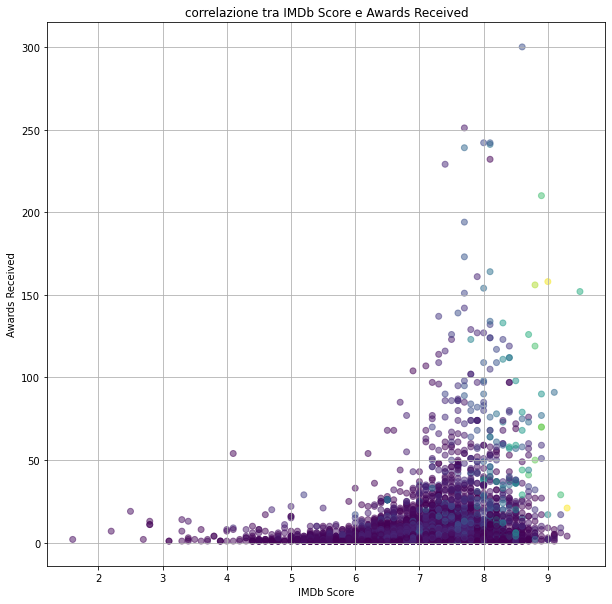

In [53]:
# punto 2
fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(x, y, c = votes, alpha = 0.5)

ax.set_title("correlazione tra IMDb Score e Awards Received")
ax.set_xlabel("IMDb Score")
ax.set_ylabel("Awards Received")
ax.grid()

plt.show()

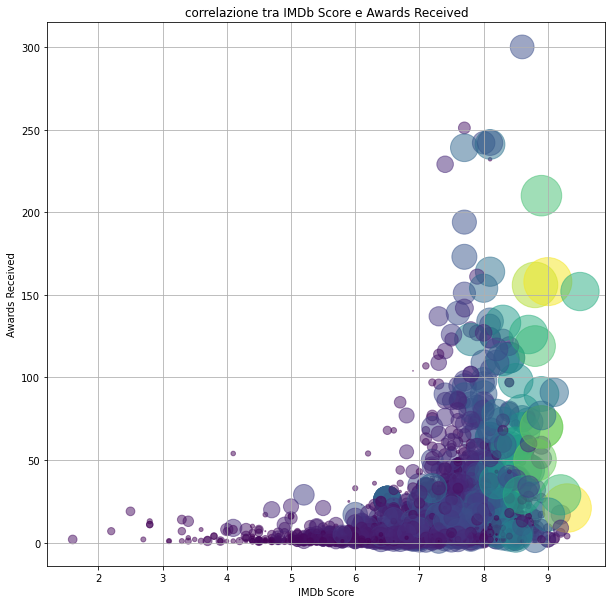

In [52]:
# punto 3
size = votes /1000

fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(x, y, s = size, c = votes, alpha = 0.5)

ax.set_title("correlazione tra IMDb Score e Awards Received")
ax.set_xlabel("IMDb Score")
ax.set_ylabel("Awards Received")
ax.grid()

plt.show()